In [ ]:


# #hide 
# from fastbook import * 
# from fastai.vision.widgets import *

# lepiej importować jawnie funkcje ponieważ przez przypadek można nadpisać inne wbudowane funkcje pythona
from fastai.vision.all import (
    ImageBlock,
    CategoryBlock, 
    get_image_files, 
    RandomSplitter, 
    Resize, 
    RandomResizedCrop, 
    aug_transforms, 
    vision_learner, 
    resnet18, 
    error_rate,
    ClassificationInterpretation,
    load_learner,
    PILImage,
    )

from fastbook import DataBlock, parent_label

from ipywidgets import widgets, VBox
from types import SimpleNamespace
from datasets import load_dataset
from pathlib import Path # nie było zaimportowane
import matplotlib.pyplot as plt

import fastbook
fastbook.setup_book()



In [17]:
dataset = load_dataset("zz990906/garbage_detection")

README.md:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/594 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/22 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

(…).rf.059cc40c1d94a41d20754cf1070e5ed2.jpg:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

(…).rf.5e0cfa43fd6259084817595be7d8033a.jpg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

(…).rf.07e80a60fefd872d8e4a57d6525ed008.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

(…).rf.69cc45963e10add429f59da437407ac5.jpg:   0%|          | 0.00/22.0k [00:00<?, ?B/s]

(…).rf.8ace89b8d86a513c54b84a0b26c87f2e.jpg:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

(…).rf.b1ae5f16ea170d96e5fe5f38bd3c56ae.jpg:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

(…).rf.7becdb8e22c30d4c7783b7215f091156.jpg:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

(…).rf.09bea8075f1cec9c350fbcc1e8881656.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

(…).rf.dad5e44ad50493cacb9a0ff4a99b36fd.jpg:   0%|          | 0.00/14.9k [00:00<?, ?B/s]

(…).rf.cad3f48e5fb1d56aa67474b3b426ee64.jpg:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

(…).rf.67173d0656d0f5f30e959efd25e39632.jpg:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

(…).rf.d53f0f2e3b217969b2668caf462262e6.jpg:   0%|          | 0.00/21.8k [00:00<?, ?B/s]

(…).rf.470f5828faf1f1e350ced13226db5e6a.jpg:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

(…).rf.1e03bc696773d8cea8df3c2060a80194.jpg:   0%|          | 0.00/22.9k [00:00<?, ?B/s]

(…).rf.5314fcb1f92bf16f39655f38b9c02110.jpg:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

(…).rf.267f5cbeb1e4dbb82fd132b2cc559bde.jpg:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

(…).rf.6c541a9541166062dd8b8e429f5b7158.jpg:   0%|          | 0.00/22.7k [00:00<?, ?B/s]

(…).rf.038892fd90721431c19fc50c256676eb.jpg:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

(…).rf.6e5385ecdcf8b5ce788d0d3ad46d758c.jpg:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

(…).rf.da5529a577d2bb67b9061d5a4208f804.jpg:   0%|          | 0.00/17.6k [00:00<?, ?B/s]

(…).rf.6ddde4ff252bd34e8224593a5ad0c9f5.jpg:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

(…).rf.1d56bd1903c6faef1cbeb34710723241.jpg:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

(…).rf.7c398f26358b40faf1b90401b750ca86.jpg:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

(…).rf.4883a73547adf3eae9d49daeefa88206.jpg:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

(…).rf.93ad3df6b06c8e458ff97811888af9c5.jpg:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

(…).rf.1f9236b717439b8c48aafcec881465a5.jpg:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

(…).rf.7b18d4da9c345b2f139d3291f61360f3.jpg:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

(…).rf.fe00562a5ca7d453444e86a13f6dcb9b.jpg:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

(…).rf.d765e55d9c9f87ab0a7b7a05523758df.jpg:   0%|          | 0.00/13.4k [00:00<?, ?B/s]

(…).rf.7d75313456298c0a41cb31bccec0c509.jpg:   0%|          | 0.00/13.8k [00:00<?, ?B/s]

(…).rf.82668c91661a33b41c7eea348429cd23.jpg:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

(…).rf.94d18b3d6be7201f15407c6d4686ab80.jpg:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

(…).rf.25dbca890fe0475187934804027a8aad.jpg:   0%|          | 0.00/16.7k [00:00<?, ?B/s]

(…).rf.d8ebd3130eee7e6e742f89748e08ce46.jpg:   0%|          | 0.00/16.7k [00:00<?, ?B/s]

(…).rf.7886d03a6c2acf3bb2a1c5f41df8e9e3.jpg:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

(…).rf.1561e61fe4821ebc19a14835ac489857.jpg:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

(…).rf.319a96ccacaec0173dccdf7c0f5242dd.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

(…).rf.dd62fa3d44441b1c00efdb8a5ee59b5d.jpg:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

(…).rf.ac1da009489d22612b6debf80153186e.jpg:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

(…).rf.dba29346a077c6ae11f5ce1b6cbbab0e.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

(…).rf.13358994a1a0ecd7dd6ce8a2555ba5d8.jpg:   0%|          | 0.00/13.8k [00:00<?, ?B/s]

(…).rf.382a90c27848415ad5eb6834cbac8166.jpg:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

(…).rf.88d61bf1729a8451c537fa64948a1ade.jpg:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

(…).rf.f8ffcca7c29b81c8a21ca1987a28dae1.jpg:   0%|          | 0.00/18.3k [00:00<?, ?B/s]

(…).rf.4af381ad19d57b8dae5b6f62960f6716.jpg:   0%|          | 0.00/18.0k [00:00<?, ?B/s]

(…).rf.3cbe50f2fb6afa86a0be1e9ad9413f50.jpg:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

(…).rf.9cbf851febce2a7f33b68ea301253488.jpg:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

(…).rf.f4c56b182d3f5cba2f00fbfaab86c7cf.jpg:   0%|          | 0.00/18.0k [00:00<?, ?B/s]

(…).rf.5c22f23ae82ee86f3e24c0680495d3e3.jpg:   0%|          | 0.00/18.9k [00:00<?, ?B/s]

(…).rf.8f850eb2494ea9a41baea55515b39239.jpg:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

(…).rf.c4dc36850141488bdb7d1a5aaa4636ba.jpg:   0%|          | 0.00/18.3k [00:00<?, ?B/s]

(…).rf.9c234967be9eca25d09692a85856c11b.jpg:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

(…).rf.c670ffbae1b1689ba3f3f28d68ee2fc4.jpg:   0%|          | 0.00/18.6k [00:00<?, ?B/s]

(…).rf.69fdf059ceb315fdcc77521151fc521c.jpg:   0%|          | 0.00/19.1k [00:00<?, ?B/s]

(…).rf.9ca1714bd781731c614d6446d77bf701.jpg:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

(…).rf.f681c2f1087128a04d2750549dec6b48.jpg:   0%|          | 0.00/18.0k [00:00<?, ?B/s]

(…).rf.04f37799b83106a2f4a4032d484f3718.jpg:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

(…).rf.38838d1e3fdb6b778c0dfb2e14414bbd.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

(…).rf.f55624fed3fda4aea43c15d497c83bbe.jpg:   0%|          | 0.00/19.0k [00:00<?, ?B/s]

(…).rf.296f71ed8e186fa2039cfcfd1f0b4b34.jpg:   0%|          | 0.00/17.9k [00:00<?, ?B/s]

(…).rf.9af1eef469c78d2a148835bc40d7c56c.jpg:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

(…).rf.31e74999aa4ffcf2cb935d16d596a6c4.jpg:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

(…).rf.7c4833a44660b4b1616b4b18c84c80f5.jpg:   0%|          | 0.00/18.6k [00:00<?, ?B/s]

(…).rf.8c4c95c33ea5b115eb56382813581cf1.jpg:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

(…).rf.bf3a285b6b106e394e2a7e8ca13aecd0.jpg:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

(…).rf.802bada5891f1e2299b81013d3f4597c.jpg:   0%|          | 0.00/11.8k [00:00<?, ?B/s]

(…).rf.3ef5fd3a6386a28e23a2c5221e1cce90.jpg:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

(…).rf.643dbab7a5696da6a30d45bfe8cf2286.jpg:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

(…).rf.57f6158209741226e7c1697b68d660d4.jpg:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

(…).rf.c147ff4680c5fda620202c6c759b555c.jpg:   0%|          | 0.00/11.9k [00:00<?, ?B/s]

(…).rf.00a5a86e23f47e6685e910efd6e38848.jpg:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

(…).rf.b1aaf4bb1376426490c43efdf7dd3bb1.jpg:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

(…).rf.47a1b1f9dfda1484d765f665f5cd47cc.jpg:   0%|          | 0.00/16.4k [00:00<?, ?B/s]

(…).rf.3d56bd52d2576555f7a2b3c8cac8ae6d.jpg:   0%|          | 0.00/16.6k [00:00<?, ?B/s]

(…).rf.595f8a182002eba8f17a866b1e2961f2.jpg:   0%|          | 0.00/16.7k [00:00<?, ?B/s]

(…).rf.73209bdbd9ca91bb7c7c70d448f65070.jpg:   0%|          | 0.00/17.9k [00:00<?, ?B/s]

(…).rf.98366baddc42597568e0989fc947ac89.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

(…).rf.6bac90d7082fcec56b56cd06135c40b4.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

(…).rf.d97835dabda77448a3f5e4e0b4b99d30.jpg:   0%|          | 0.00/13.0k [00:00<?, ?B/s]

(…).rf.a8df3c6db720434b446c630e4aa6dd0e.jpg:   0%|          | 0.00/13.4k [00:00<?, ?B/s]

(…).rf.e6df83e2413ae933f4fb9369bed0fbd5.jpg:   0%|          | 0.00/17.6k [00:00<?, ?B/s]

(…).rf.2558f101bcad9ac05592f30c02a8fee4.jpg:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

(…).rf.55f6034ec80688c8ac4f702cb1b5a3a1.jpg:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

(…).rf.484bd4c4be01e9a6adac9b6aaea38fe5.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

(…).rf.1155c1d6c9cbd9457d3c096d6ccaf2b4.jpg:   0%|          | 0.00/17.9k [00:00<?, ?B/s]

(…).rf.fac0b69a001c9b1a5293aa588e829f1a.jpg:   0%|          | 0.00/21.8k [00:00<?, ?B/s]

(…).rf.0019ccec63bb2ec402420d5a68811f00.jpg:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

(…).rf.4e60c0f2b97fe9c9b0b1a5bfebfcabb5.jpg:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

(…).rf.525f2d0ecd3393038442219bfe21fd28.jpg:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

(…).rf.e1458ba8607188cc6809c57674b84b87.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

(…).rf.1ef0adb53f0a227421c1425f290ce5c1.jpg:   0%|          | 0.00/15.5k [00:00<?, ?B/s]

(…).rf.e0a9ca90e4516913c766c2781e8c8a9c.jpg:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

(…).rf.ef89cf3710872fe4045d3fef2a4c6878.jpg:   0%|          | 0.00/15.2k [00:00<?, ?B/s]

(…).rf.6993ec6526a254160a8724e356f7e928.jpg:   0%|          | 0.00/18.3k [00:00<?, ?B/s]

(…).rf.50df9c4e7741e50a5e31cf7b006c7157.jpg:   0%|          | 0.00/18.0k [00:00<?, ?B/s]

(…).rf.889565d0b51add09c084d70c0d9d32d9.jpg:   0%|          | 0.00/18.6k [00:00<?, ?B/s]

(…).rf.dbf9370892ce461574710ebc431e1dd0.jpg:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

(…).rf.9c7a6fa9d839ab4d78c86834e98a937e.jpg:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

(…).rf.aa4e2bd064ccb68b9da77a345f0c995c.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

(…).rf.eb9582fbd9266274f60b9ba0d5c78c68.jpg:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

(…).rf.03e7e7a5bf776d60a0fef61d712a261e.jpg:   0%|          | 0.00/22.9k [00:00<?, ?B/s]

(…).rf.77f690d81a8b6d08eaa61be185ccc348.jpg:   0%|          | 0.00/18.3k [00:00<?, ?B/s]

(…).rf.c62d998d7fea25fa0d6f7fe914690354.jpg:   0%|          | 0.00/19.8k [00:00<?, ?B/s]

(…).rf.b3eb084ea560d1faeaae68baec459d7a.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

(…).rf.82df68657ffe7abdb0f797bbc6e0b66d.jpg:   0%|          | 0.00/22.3k [00:00<?, ?B/s]

(…).rf.94d7aecc26254101c26b5d46fed2f9f7.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

(…).rf.843397d87677a34cb93f09bc68f14b34.jpg:   0%|          | 0.00/18.6k [00:00<?, ?B/s]

(…).rf.cdda726b894a5d750e4a8a58625be1b6.jpg:   0%|          | 0.00/17.9k [00:00<?, ?B/s]

(…).rf.03ebc041e98150b86b02e00db6d39905.jpg:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

(…).rf.4e7644c256fa59b43e5ce96a3641e9bf.jpg:   0%|          | 0.00/14.9k [00:00<?, ?B/s]

(…).rf.0408953618c75ef4c9896e7ae6d792c5.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

(…).rf.e20bc900b06a02fb4bb0d308339d44b9.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

(…).rf.5c564aeec33ab1feffa97d9b22ccb07c.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

(…).rf.4f696be98ccd3a74c603e2b82c6094f9.jpg:   0%|          | 0.00/14.8k [00:00<?, ?B/s]

(…).rf.56c09d202ce5877f35c05777fc37a728.jpg:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

(…).rf.6c2320a2ae2289a1727fe1794078a24f.jpg:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

(…).rf.b9ce44c41d342a1fe60c4299ac88332a.jpg:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

(…).rf.26cd6fb59ac4ea6553040a6dd87af926.jpg:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

(…).rf.cd70b0e7c2273b87209d9e3db8d94dd9.jpg:   0%|          | 0.00/19.1k [00:00<?, ?B/s]

(…).rf.c5637dd823897598da43784b07612f81.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

(…).rf.ba446659626299b48dd250babd3d2855.jpg:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

(…).rf.b466ad4fb7265cf838cdc7612e8c2798.jpg:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

(…).rf.2d73e3db27c8d241d0e364de31605366.jpg:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

(…).rf.1b5e859fe33d3d50abfa7c685d45906b.jpg:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

(…).rf.9aa2ff0ce7224a726a7a1c3ef4b5ca92.jpg:   0%|          | 0.00/15.5k [00:00<?, ?B/s]

(…).rf.be826c6d14bddb18cb120715c2dc58d8.jpg:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

(…).rf.2d0ac08f48df5d7e7804448f0f95a1c6.jpg:   0%|          | 0.00/15.5k [00:00<?, ?B/s]

(…).rf.2cef2f653c30aeaf26465f06d271cb7b.jpg:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

(…).rf.fae02e97afe88542db195c9fbb3a0ec1.jpg:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

(…).rf.f294149bd54eebb4a8b8eaca2b7db955.jpg:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

(…).rf.0f0717e565886b0d8966153138237596.jpg:   0%|          | 0.00/14.4k [00:00<?, ?B/s]

(…).rf.6fcdd7dcbfac263a7be14a40426dcb88.jpg:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

(…).rf.f91c6b6290e4b00cc710f8bd27d8e1d7.jpg:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

(…).rf.673b0cebe3b1b4be89d3ace661e9bbac.jpg:   0%|          | 0.00/16.8k [00:00<?, ?B/s]

(…).rf.85a893a8cfa0a88900aea1ffa42ea2df.jpg:   0%|          | 0.00/18.6k [00:00<?, ?B/s]

(…).rf.87ccea7a075a539bc4a1f33a9eaf2d1f.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

(…).rf.3e90a6c0d4996cee0417263d4c880192.jpg:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

(…).rf.16fb9801e28de51423bd1ec34a764bba.jpg:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

(…).rf.9d86fd0b45a945575a65f5632e4c27a9.jpg:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

(…).rf.cf4b9c7e29b40aeac70b06e1236ee57d.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

(…).rf.652eacd59646348e4d87125cded31095.jpg:   0%|          | 0.00/21.3k [00:00<?, ?B/s]

(…).rf.69eca7802e3f41540129a28d90744d34.jpg:   0%|          | 0.00/17.4k [00:00<?, ?B/s]

(…).rf.c3bf5755cd3816efac3aca69d03456ea.jpg:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

(…).rf.a15633f469606cb641d74226495b7b8a.jpg:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

(…).rf.fdc5d09a9ec1e3e16025b172ac95ddda.jpg:   0%|          | 0.00/21.8k [00:00<?, ?B/s]

(…).rf.d3f1becf6617a4fdee4e33fd7228b2a6.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

(…).rf.ff40dac6b3da36bfefb76fc28a25a815.jpg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

(…).rf.05142270d9aa34533d98d5bc8c968345.jpg:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

(…).rf.d20f31a16a3713549fef73cf4a88fc83.jpg:   0%|          | 0.00/12.8k [00:00<?, ?B/s]

(…).rf.3f3d6242794110c6667a0f14476d64ed.jpg:   0%|          | 0.00/23.4k [00:00<?, ?B/s]

(…).rf.ed72576b6200589c84aa9d9a672d946e.jpg:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

(…).rf.74a0000c8afc4c873d3171ba2971b537.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

(…).rf.3fe2cbe25d74b40d124bb213dd2b58e7.jpg:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

(…).rf.905d15b805c2f4a16e946abdd89de2b1.jpg:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

(…).rf.6afa3f51074d01f75e05f63c0e8c4c4e.jpg:   0%|          | 0.00/18.3k [00:00<?, ?B/s]

(…).rf.cc6aeda01c0625494f15b29ff7afffd2.jpg:   0%|          | 0.00/23.5k [00:00<?, ?B/s]

(…).rf.1b0c7ca407f05d1e1db053e03723b6d7.jpg:   0%|          | 0.00/22.5k [00:00<?, ?B/s]

(…).rf.7df4af53bbb26cbadeb74503262dd527.jpg:   0%|          | 0.00/21.4k [00:00<?, ?B/s]

(…).rf.60a998d56b8ce49b63127839c1533493.jpg:   0%|          | 0.00/22.7k [00:00<?, ?B/s]

(…).rf.7e8249d864fa0c5ae8d8930e5f935a87.jpg:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

(…).rf.f4dbbd6111376969b1287196a4be9201.jpg:   0%|          | 0.00/22.3k [00:00<?, ?B/s]

(…).rf.28854d127232023f9bb9d621e965fdbb.jpg:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

(…).rf.28dc827f32710ef58e83fb36037182a2.jpg:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

(…).rf.0e213a85d5a0e2086c9ead6dd6538218.jpg:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

(…).rf.cda72078a05b200c78d1e30bc705f4a9.jpg:   0%|          | 0.00/14.9k [00:00<?, ?B/s]

(…).rf.77650a3f1496385a37d3c5c6c74b5274.jpg:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

(…).rf.93ef919edac1bf1cebe2af3d9fb36506.jpg:   0%|          | 0.00/25.0k [00:00<?, ?B/s]

(…).rf.5744e1c67d7bad519ba936f8b4ce504d.jpg:   0%|          | 0.00/26.1k [00:00<?, ?B/s]

(…).rf.192c6fa1c94dc8b1162e763437779c06.jpg:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

(…).rf.c46713b35f369b68e1dfda0df660fa3f.jpg:   0%|          | 0.00/12.2k [00:00<?, ?B/s]

(…).rf.708f2b1256822ef7a9ef5cb13e2b406f.jpg:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

(…).rf.76e47f8f7be9003101497cf43cef9a6c.jpg:   0%|          | 0.00/16.7k [00:00<?, ?B/s]

(…).rf.ebe68d24408cc5f45284e90b5802541f.jpg:   0%|          | 0.00/12.4k [00:00<?, ?B/s]

(…).rf.df0a94bf098e33655419598a755a5dde.jpg:   0%|          | 0.00/12.2k [00:00<?, ?B/s]

(…).rf.9f34c233500d5383963a27bbee57d018.jpg:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

(…).rf.8e17fe5039ae5640a9a3216bffdaa6d2.jpg:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

(…).rf.a69cf64cc9d31c513316313906ba7b27.jpg:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

(…).rf.c9d40691c46d79b91e7e886ef2566481.jpg:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

(…).rf.acb64f63cdd1e6aac50e99029a7b41eb.jpg:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

(…).rf.aed2a8ebc9a74248568386d5d06593ac.jpg:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

(…).rf.724f57a6d9775cfa6374ddbf54df5456.jpg:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

(…).rf.f3400a4610f7a8558a085cfae41ecb05.jpg:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

(…).rf.3f59133646cde2813165d0c883b5b3ff.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

(…).rf.ff0e6c7a94e9d6eae930a61eac7bc74c.jpg:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

(…).rf.dc3fba3292b3bdadaabc2a7bce9596f3.jpg:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

(…).rf.6bea6009c9611dec29c9cf2ffb89c71b.jpg:   0%|          | 0.00/19.8k [00:00<?, ?B/s]

(…).rf.9f2cc404a098b87d111c7ef00da6eb1f.jpg:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

(…).rf.13138b528f09090a2dcbab481efee206.jpg:   0%|          | 0.00/22.7k [00:00<?, ?B/s]

(…).rf.44a83940dcdeab93cd584186cf958992.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

(…).rf.fb153cf2f1c67682478e4e88bbef6a37.jpg:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

(…).rf.4b4d829e779415800cb6ddbd7f987a5e.jpg:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

(…).rf.2b9d4d362de258aae8d77395fc5b2ec2.jpg:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

(…).rf.7409d3da4deaca5af3bc382945e88647.jpg:   0%|          | 0.00/22.9k [00:00<?, ?B/s]

(…).rf.2f89e6cb8fbd18ab40486684614ecd1b.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

(…).rf.19f43d3dda4b7820ddbc7550c283a04e.jpg:   0%|          | 0.00/16.7k [00:00<?, ?B/s]

(…).rf.992ab25f9a73efcbffed93f65faa97c7.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

(…).rf.d7f1291ef0350b1079bcf986590fbc87.jpg:   0%|          | 0.00/21.8k [00:00<?, ?B/s]

(…).rf.633c8c34fa7b76d710a789746b930998.jpg:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

(…).rf.83635e9aa5adad0876b4270d2cb5557b.jpg:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

(…).rf.f5306abf3106e590fe84adfbca4ed2a5.jpg:   0%|          | 0.00/13.6k [00:00<?, ?B/s]

(…).rf.343ce109da2569e11aad694e85489933.jpg:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

(…).rf.46fd4ca99cbb4c6963b114234a83dea5.jpg:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

(…).rf.5208c2cd1db3fb06bd4fc58e26f188d4.jpg:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

(…).rf.2d270aec0afd6fdd15325fe5059b5c8c.jpg:   0%|          | 0.00/19.6k [00:00<?, ?B/s]

(…).rf.774e6f6c61badad16606ae2aea5481fb.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

(…).rf.ebab9babe4d511bad39ca3d48f970757.jpg:   0%|          | 0.00/22.6k [00:00<?, ?B/s]

(…).rf.ebbaa63ad51bafe4c058632976bf81a9.jpg:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

(…).rf.07f20ee324c7cc1eb273d074622b38ed.jpg:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

(…).rf.bca17aff39c1a5fbd2b0f8369b7aa927.jpg:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

(…).rf.1d488c1c260befcee8221bd964e6d2c4.jpg:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

(…).rf.0c4523aa08f2dde5d49495f5f09b1f31.jpg:   0%|          | 0.00/24.3k [00:00<?, ?B/s]

(…).rf.8bd3aa3971e3dc4d861774858b235f37.jpg:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

(…).rf.df2fa3a99cc67bcf5941f8a65bb5ed6b.jpg:   0%|          | 0.00/23.8k [00:00<?, ?B/s]

(…).rf.3357d17ab6c58c2225284e520bde6562.jpg:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

(…).rf.b73124e2ef8864bbf0b06082c93d8685.jpg:   0%|          | 0.00/16.4k [00:00<?, ?B/s]

(…).rf.2216ceb6f27e3cbd5bb9c4f7d772d96c.jpg:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

(…).rf.b1fe1bd33255bb8680fbc7472e0b5093.jpg:   0%|          | 0.00/9.22k [00:00<?, ?B/s]

(…).rf.bc62f6107c06784b5dabd8110a0f0194.jpg:   0%|          | 0.00/9.66k [00:00<?, ?B/s]

(…).rf.f5e40d2adca5c047acd5c2c7e3317d5d.jpg:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

(…).rf.52343e4ffb7313a76bad47343b0119fa.jpg:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

(…).rf.5cb8291edb8cdcaa047ba11cfc0ae1a4.jpg:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

(…).rf.162d6810ed8f54ffd80ee87eca46b57c.jpg:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

(…).rf.f25cedd1cd894eb8d511f04840246e79.jpg:   0%|          | 0.00/18.9k [00:00<?, ?B/s]

(…).rf.e72287d40aaf0aa967d70bd9777f8248.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

(…).rf.9d70e3e385ac20801b8baec6783300f1.jpg:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

(…).rf.a42e07cb1464b325031e09bbe0df1516.jpg:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

(…).rf.11e8f984ca6aa017931a7f316d83d18f.jpg:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

(…).rf.2b0243e672d6acff38417ac662c091f7.jpg:   0%|          | 0.00/18.3k [00:00<?, ?B/s]

(…).rf.32e27cef496dcf7444e76c3387954b52.jpg:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

(…).rf.ecd9789b5853e542f385d53f0a43c6cc.jpg:   0%|          | 0.00/22.3k [00:00<?, ?B/s]

(…).rf.db57a70490c113c9ab2f39f4d11ee0c8.jpg:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

(…).rf.de7d8c49f09c53808944a639e4e056ef.jpg:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

(…).rf.58f7e259b543451216453a14875084d5.jpg:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

(…).rf.c5e84219507d53d98a9c02de1e6d6c82.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

(…).rf.2a7998aed77a1f11ee139ca5c8da6b3b.jpg:   0%|          | 0.00/24.6k [00:00<?, ?B/s]

(…).rf.ab43096a0b02fee4c267e2c9b138781c.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

(…).rf.f5a694bc75d4f570c2be747b609bf4ae.jpg:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

(…).rf.7268c105a4f0368775381586f1439556.jpg:   0%|          | 0.00/24.4k [00:00<?, ?B/s]

(…).rf.9888026d27dbc6fabbd39a3fea88657d.jpg:   0%|          | 0.00/22.2k [00:00<?, ?B/s]

(…).rf.1e748cdce3fa0c340b7dce08d8cb5068.jpg:   0%|          | 0.00/22.1k [00:00<?, ?B/s]

(…).rf.73ad84fdaaa5c625e65e6fb766125182.jpg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

(…).rf.8223671a360d1e5313001e5c829e22e6.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

(…).rf.aee84c980026f48cafd91a04bf31f0d0.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

(…).rf.ce93f41ba66fe1e4eced82bf0f1ca3bb.jpg:   0%|          | 0.00/22.0k [00:00<?, ?B/s]

(…).rf.142bd42a9dfb61fb6ac5c79950306b0d.jpg:   0%|          | 0.00/18.0k [00:00<?, ?B/s]

(…).rf.8ea4ea08b2e85894d192750de85bb559.jpg:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

(…).rf.f6fb7f3dc66f6b4d16a71cbfd428119b.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

(…).rf.8b7b8ef65a8ae3b5d7211beb3a8e0f33.jpg:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

(…).rf.5ea08b0f924a84323adda4aca291924a.jpg:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

(…).rf.871b693c6c210d64580d757415952d86.jpg:   0%|          | 0.00/16.6k [00:00<?, ?B/s]

(…).rf.86d969cb9acf857e5604759231d0aa47.jpg:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

(…).rf.88b22ede393fcdda87f663ec4f8f6e01.jpg:   0%|          | 0.00/16.8k [00:00<?, ?B/s]

(…).rf.39de180d67b5e8dd7c2ce68108e52066.jpg:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

(…).rf.9a34cea405043faac14149e1b448004f.jpg:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

(…).rf.a72720f619eebd82d7bc0a970a62ef7d.jpg:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

(…).rf.d1dec060c874fe0d23f7e663807501aa.jpg:   0%|          | 0.00/19.6k [00:00<?, ?B/s]

(…).rf.a63e79890cefe822e2b6ed6385845c47.jpg:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

(…).rf.c8e99b48797b7f3fc0fced2b77bcb0e0.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

(…).rf.11207849a1119fc69da8c16650305040.jpg:   0%|          | 0.00/19.6k [00:00<?, ?B/s]

(…).rf.bdce3be34fd96d786c1c060f7a215c71.jpg:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

(…).rf.1d57c896e4d70e7b32c107eb8bdc013e.jpg:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

(…).rf.c8f907f0d25a6d25a521364a9a97446a.jpg:   0%|          | 0.00/14.6k [00:00<?, ?B/s]

(…).rf.202d34f6adceccb6af603d4cb56083aa.jpg:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

(…).rf.b9188b67d94bcf85e13cad2aecc1378e.jpg:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

(…).rf.236c54255dbb07225cae9461c79b9c8a.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

(…).rf.33e69573e2461d206b6d8765f68ab086.jpg:   0%|          | 0.00/22.0k [00:00<?, ?B/s]

(…).rf.e421b927a30398c71800ab9ede0f5a8a.jpg:   0%|          | 0.00/17.4k [00:00<?, ?B/s]

(…).rf.fe54183bb699a42cc7d22584a6c33c90.jpg:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

(…).rf.710130b6c01bc473332e0fbcef25ff91.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

(…).rf.96b700de1999677ef5bbdb5836d9d6fd.jpg:   0%|          | 0.00/19.2k [00:00<?, ?B/s]

(…).rf.f66b84fb4c29aacd01d7ef10ddfc475a.jpg:   0%|          | 0.00/19.8k [00:00<?, ?B/s]

(…).rf.621722285eeb19723b4b16bb5a670e35.jpg:   0%|          | 0.00/23.7k [00:00<?, ?B/s]

(…).rf.ca353b775eff36a6653eed83c783ce59.jpg:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

(…).rf.c7317edd4e815764662777918c769964.jpg:   0%|          | 0.00/22.0k [00:00<?, ?B/s]

(…).rf.03eb98043d90d62dd74ffae63bd0e6e7.jpg:   0%|          | 0.00/22.7k [00:00<?, ?B/s]

(…).rf.2b30e08ff69a18d7ad0cd7d4b8745e85.jpg:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

(…).rf.7f41f11f4b64d8cb4ac220118363e79f.jpg:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

(…).rf.8abe63b50bf49133a2106b142545633c.jpg:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

(…).rf.0424684aa783e5ffdcc4cb05c26fb930.jpg:   0%|          | 0.00/22.1k [00:00<?, ?B/s]

(…).rf.64ae5f4e9346709fe0a87c394f1591eb.jpg:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

(…).rf.060a602f5bb77daf9df83a730d213ae4.jpg:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

(…).rf.56154305c23a025c883730151edcb2e8.jpg:   0%|          | 0.00/21.8k [00:00<?, ?B/s]

(…).rf.1a6ce2e2c84087c9ba1bfde646f0ab69.jpg:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

(…).rf.b66ff4bd7deb0d82db099cc23a4b6a0a.jpg:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

(…).rf.a73ca24436b87014524c9f5a326c1d34.jpg:   0%|          | 0.00/23.1k [00:00<?, ?B/s]

(…).rf.176acb593b2d6653a6000c8557bbb67b.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

(…).rf.39a51546c234985b887e7531e70647b4.jpg:   0%|          | 0.00/18.1k [00:00<?, ?B/s]

(…).rf.8fa1203cdd9699cc683c4c0363045925.jpg:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

(…).rf.c9c463328338cc9c04a9ac6578af52e5.jpg:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

(…).rf.a5ee8e314cc9605ab28026b11775d13c.jpg:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

(…).rf.8dbcf607aae54093b6f1d0d3af40da74.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

(…).rf.162e898163f35de274cc4276c96b3bdc.jpg:   0%|          | 0.00/19.1k [00:00<?, ?B/s]

(…).rf.fac1f7148e97486ed59d74cf1dcf452d.jpg:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

(…).rf.99a49d58f46d9c686dba57c881fde90c.jpg:   0%|          | 0.00/27.4k [00:00<?, ?B/s]

(…).rf.c591c778ac1b609be214ea0234972c0d.jpg:   0%|          | 0.00/27.0k [00:00<?, ?B/s]

(…).rf.3ec87d233a4d8c672f13e885171119d6.jpg:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

(…).rf.dfc69b52f95f7758605bf8f007f1766b.jpg:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

(…).rf.a988c3034f6159b53acfd6b547c276df.jpg:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

(…).rf.2dd260679ab73a34f4e113241ae12d9f.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

(…).rf.e32cabf7ef512106985448ab67ccfc55.jpg:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

(…).rf.c722bed6073668f7ce84e267c6231e57.jpg:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

(…).rf.2d1fe224bcaf6a9f0bd83352cd4c7038.jpg:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

(…).rf.8cfd55e2f32d945c5a8691863b31f61c.jpg:   0%|          | 0.00/26.9k [00:00<?, ?B/s]

(…).rf.72abb39a84ec5f2a8e9e03f7ce380060.jpg:   0%|          | 0.00/18.0k [00:00<?, ?B/s]

(…).rf.9fb845eacc3817798a0b71074fe39be8.jpg:   0%|          | 0.00/19.8k [00:00<?, ?B/s]

(…).rf.a0cc93ab447ca79f61a37e655f1af00a.jpg:   0%|          | 0.00/9.71k [00:00<?, ?B/s]

(…).rf.c8395450723561d0c883c76d44668cae.jpg:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

(…).rf.c7becbf7147fd8e96a8317f1f97008af.jpg:   0%|          | 0.00/13.4k [00:00<?, ?B/s]

(…).rf.488959b73e7b57d68be192ff4bd6d614.jpg:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

(…).rf.69c38345dd16eeae81a840513ef25d4d.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

(…).rf.60731d1e32f1f31e3a397184df9e8681.jpg:   0%|          | 0.00/18.3k [00:00<?, ?B/s]

(…).rf.b031c6f68421a44c38214e5bd2d00db5.jpg:   0%|          | 0.00/13.7k [00:00<?, ?B/s]

(…).rf.21fc2c76fe0bf62060781e8f2553966d.jpg:   0%|          | 0.00/19.1k [00:00<?, ?B/s]

(…).rf.eb631d33a071db3fb59032f5516f15c0.jpg:   0%|          | 0.00/19.0k [00:00<?, ?B/s]

(…).rf.62c86b7c4d3970741b4f926bd45955c3.jpg:   0%|          | 0.00/18.9k [00:00<?, ?B/s]

(…).rf.e795d8156eff7d7911bff305a7042a37.jpg:   0%|          | 0.00/18.1k [00:00<?, ?B/s]

(…).rf.28ac62e26ed9b7000119211063380022.jpg:   0%|          | 0.00/29.5k [00:00<?, ?B/s]

(…).rf.53459a26c895f070092a71edd86bc666.jpg:   0%|          | 0.00/30.0k [00:00<?, ?B/s]

(…).rf.88f21dbed8a3a5d6391ebcaa8f2c328b.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

(…).rf.352221bf11b3697924ee7223ab0c5419.jpg:   0%|          | 0.00/29.7k [00:00<?, ?B/s]

(…).rf.f6b87ed455506709b6528ccd33a23363.jpg:   0%|          | 0.00/11.8k [00:00<?, ?B/s]

(…).rf.36fe3ba2ca5c649283917506d8bc26f0.jpg:   0%|          | 0.00/11.9k [00:00<?, ?B/s]

(…).rf.bbe275d1ecc891d7ac9b63a042539cf7.jpg:   0%|          | 0.00/12.1k [00:00<?, ?B/s]

(…).rf.6219cdd3402a7664b2080cdc6ce020ac.jpg:   0%|          | 0.00/12.4k [00:00<?, ?B/s]

(…).rf.93df6b4598a7feb8f3bc9a2291887181.jpg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

(…).rf.c1cdac610ca2841bc0ce98f0344be3f7.jpg:   0%|          | 0.00/12.6k [00:00<?, ?B/s]

(…).rf.165636bdf0f2548a2b1e485c3930d99a.jpg:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

(…).rf.d6ea6e1cb84ff68fd87de3645ef9bab1.jpg:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

(…).rf.23d16b14df7f65fa59bca6ab8d6dbe5c.jpg:   0%|          | 0.00/23.1k [00:00<?, ?B/s]

(…).rf.954d0d2f662566faee813787a81dd506.jpg:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

(…).rf.1e757f2bf2045293e7467d0859ce979d.jpg:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

(…).rf.95d01cfc83cd2a44b2da899db94728eb.jpg:   0%|          | 0.00/22.8k [00:00<?, ?B/s]

(…).rf.5028316dcdc5004bd5b44bfb62b06aaa.jpg:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

(…).rf.059a3f608c7e454aee22333b4568968f.jpg:   0%|          | 0.00/18.1k [00:00<?, ?B/s]

(…).rf.be8796b70003839bd7afeda337840dfd.jpg:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

(…).rf.5ae012c1d5dcba7603ef88a791012a78.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

(…).rf.72ec252ca0b4e827b9fb9fa450d2c0fb.jpg:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

(…).rf.65b36d9f08a6ae2ed3f05d89936c5d5e.jpg:   0%|          | 0.00/13.7k [00:00<?, ?B/s]

(…).rf.36ae0f55d94e4e1cca8c5073fe0b2359.jpg:   0%|          | 0.00/18.6k [00:00<?, ?B/s]

(…).rf.e36d6c758e4db20b80e9a65aa48fa171.jpg:   0%|          | 0.00/12.1k [00:00<?, ?B/s]

(…).rf.87b95b7df09a47c2a4df12caf066760f.jpg:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

(…).rf.3efe9f1606699aebaab0420950042d4b.jpg:   0%|          | 0.00/13.3k [00:00<?, ?B/s]

(…).rf.7bf5118f8901e2571cd98add73c7833c.jpg:   0%|          | 0.00/13.3k [00:00<?, ?B/s]

(…).rf.f6a418052aaed2d9436f1b5cf0f44432.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

(…).rf.1684171051f3780888ac501bbb6e5936.jpg:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

(…).rf.c3004474386c8dd7e7e3c0b787c8245e.jpg:   0%|          | 0.00/21.2k [00:00<?, ?B/s]

(…).rf.33e2e3a9165322d194d5669d2ad1f769.jpg:   0%|          | 0.00/22.9k [00:00<?, ?B/s]

(…).rf.c42044ad6b81dd59e2ab9d6ca9bd9968.jpg:   0%|          | 0.00/23.3k [00:00<?, ?B/s]

(…).rf.43fb349cc43c03ec6cf556b421604021.jpg:   0%|          | 0.00/22.4k [00:00<?, ?B/s]

(…).rf.90782336e785cdba4cd9de9a66fbbdde.jpg:   0%|          | 0.00/14.8k [00:00<?, ?B/s]

(…).rf.7e95ec5050c460810fccba14e8a14553.jpg:   0%|          | 0.00/14.5k [00:00<?, ?B/s]

(…).rf.23dd0e8bd395328d398e036a3ea9df70.jpg:   0%|          | 0.00/23.3k [00:00<?, ?B/s]

(…).rf.f88072450af7ee65c875fc165a3e806e.jpg:   0%|          | 0.00/22.1k [00:00<?, ?B/s]

(…).rf.391fa20fb62cc88557b53b4da57759ee.jpg:   0%|          | 0.00/14.4k [00:00<?, ?B/s]

(…).rf.0d5838b23d015f9d4f13707af4394aa9.jpg:   0%|          | 0.00/14.5k [00:00<?, ?B/s]

(…).rf.6a58507d43d00c7296d7ee46eb0df665.jpg:   0%|          | 0.00/14.5k [00:00<?, ?B/s]

(…).rf.6356f22a2569e22473f8b3a76baf742c.jpg:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

(…).rf.51280bb8eb9aaddf04955dff90fe7aad.jpg:   0%|          | 0.00/13.6k [00:00<?, ?B/s]

(…).rf.3d7265a8e4cc8e9865bfda8b9e9fd1d5.jpg:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

(…).rf.e45e7f4dfeaad74bf55eacfd21765c83.jpg:   0%|          | 0.00/14.0k [00:00<?, ?B/s]

(…).rf.6c9726e0840b7111e3e87755547b5878.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

(…).rf.e9b907cd0329ac93464d66c7a361ddd1.jpg:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

(…).rf.82c9e017a3d3c218a96276468ca084a4.jpg:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

(…).rf.bff4e1803e514ea8c90ab0e40c36748a.jpg:   0%|          | 0.00/19.2k [00:00<?, ?B/s]

(…).rf.028b8d10e6d6170559d27b237eaeec04.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

(…).rf.11c74aab0ea2731109f08acb9236bafe.jpg:   0%|          | 0.00/18.3k [00:00<?, ?B/s]

(…).rf.ab91848de9f2b55eb140b2102ec06c27.jpg:   0%|          | 0.00/18.6k [00:00<?, ?B/s]

(…).rf.88658ecacd355a33ca50afb032857028.jpg:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

(…).rf.7b6530754ddbcb2b45273b1d0c71c0bf.jpg:   0%|          | 0.00/17.4k [00:00<?, ?B/s]

(…).rf.8ae09b1a7ecab4a7327f698479ba7809.jpg:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

(…).rf.21f0a1f536d51790d0fc04942a261a09.jpg:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

(…).rf.ba7e1f83fdafb8bbf3f5161d23975ce7.jpg:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

(…).rf.75448705bada7b5483da8b38d26a09f3.jpg:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

(…).rf.b6781bd8d7869bc28b9262eb32e68eda.jpg:   0%|          | 0.00/16.6k [00:00<?, ?B/s]

(…).rf.4dafb91d11b24dd08db18eef2b70abd3.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

(…).rf.0e306cd8fe684247f47fc24c2b842e04.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

(…).rf.29a92bf2fa58f03b75a29676c711af92.jpg:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…).rf.83ffa1f27e8a3647b74135f3b6531381.jpg:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

(…).rf.1cfb4f20ccf93881f9635bd0edcbcd42.jpg:   0%|          | 0.00/22.9k [00:00<?, ?B/s]

(…).rf.13839e967131d74edbfa32b688fb903b.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

(…).rf.7e7699f12bf1a4ccdac7d56e44ed5a21.jpg:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

(…).rf.9dc2c3af7ba68f6ab25bafdf5174302a.jpg:   0%|          | 0.00/18.3k [00:00<?, ?B/s]

(…).rf.51c835dfa0e7a45f0139e1c6069cf912.jpg:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

(…).rf.abfa97fe71d9f03fa5265971b78fe268.jpg:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

(…).rf.f229b702bdf752c6f6a71dbc8268e865.jpg:   0%|          | 0.00/23.4k [00:00<?, ?B/s]

(…).rf.58dfd8bc18d5e1568d19865249145b4a.jpg:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

(…).rf.85448b919aa48c49fd827630f9164cfa.jpg:   0%|          | 0.00/21.2k [00:00<?, ?B/s]

(…).rf.137560caebe96caa8124c9b479873266.jpg:   0%|          | 0.00/23.4k [00:00<?, ?B/s]

(…).rf.44f98575b33db936bfdefe67c19947dc.jpg:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

(…).rf.0c1cb2f05111b448ae5a35caf7f19535.jpg:   0%|          | 0.00/22.8k [00:00<?, ?B/s]

(…).rf.768c9da9e5f95929176a2aa4758f393a.jpg:   0%|          | 0.00/24.3k [00:00<?, ?B/s]

(…).rf.c2cd20098319539e1d99a86fa8189199.jpg:   0%|          | 0.00/24.3k [00:00<?, ?B/s]

(…).rf.713d14aa4407393f01b51e8e4746f323.jpg:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

(…).rf.7b463344c72a3147ba33e393c41b163d.jpg:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

(…).rf.807be8989281521ce4352b41e1f02950.jpg:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

(…).rf.d9b7c3fbb81a152c3cf8358f8f5ec003.jpg:   0%|          | 0.00/24.0k [00:00<?, ?B/s]

(…).rf.0c43852af896d3a1f137149e73463f36.jpg:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

(…).rf.fce4913aa8e2f7c433ecdfc00456446e.jpg:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

(…).rf.68bc7d8b5536a8fd8a444c2bc97dcbce.jpg:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

(…).rf.1f449e80dbe25f848b84c529a1bdd6f1.jpg:   0%|          | 0.00/18.6k [00:00<?, ?B/s]

(…).rf.5dbf674193754a97e0b68e9ffd55463f.jpg:   0%|          | 0.00/21.2k [00:00<?, ?B/s]

(…).rf.ef2aebd56c277b0c509afd7c97a8c901.jpg:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

(…).rf.293f16625adfbbc4373548460af30f2a.jpg:   0%|          | 0.00/17.4k [00:00<?, ?B/s]

(…).rf.ab2613b916a25ed18c72f693ffc78b22.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

(…).rf.27628669c0cf428a357929b06acc9b6f.jpg:   0%|          | 0.00/19.3k [00:00<?, ?B/s]

(…).rf.5b8f768b51d67dd2805bb76c6bbe6382.jpg:   0%|          | 0.00/18.6k [00:00<?, ?B/s]

(…).rf.611db24794177fed14979e5c2c091ba4.jpg:   0%|          | 0.00/22.7k [00:00<?, ?B/s]

(…).rf.ac174e18ab2d087ddc978fd8797f50cf.jpg:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

(…).rf.05580f84dc7fed5f21317f71742abbf9.jpg:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

(…).rf.4360680759ceecb7dc0ea590fdb06bf8.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

(…).rf.d2d455f13d9cea93c81fc46e6a8c0ff7.jpg:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

(…).rf.1ad047ac6a1c3d6563064f28092db365.jpg:   0%|          | 0.00/22.9k [00:00<?, ?B/s]

(…).rf.131f8298e9bceabef3c2a03fa3f20e38.jpg:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

(…).rf.31688ffd6325ea8ff9ca5b97b0c9f61d.jpg:   0%|          | 0.00/14.1k [00:00<?, ?B/s]

(…).rf.e534211b42cb67621599d390c43f7e64.jpg:   0%|          | 0.00/13.6k [00:00<?, ?B/s]

(…).rf.f370ea2433ffa10a850dde3d5f417f29.jpg:   0%|          | 0.00/13.6k [00:00<?, ?B/s]

(…).rf.65d2a542bd2e32da39dc329fc0ac146a.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

(…).rf.a9e9c9b1710e836a33aac1df9339fa28.jpg:   0%|          | 0.00/22.1k [00:00<?, ?B/s]

(…).rf.71763309974d6bcc45e8984fecec9244.jpg:   0%|          | 0.00/21.4k [00:00<?, ?B/s]

(…).rf.6c89e883a9d6c5a253ba68a13b06c40b.jpg:   0%|          | 0.00/17.6k [00:00<?, ?B/s]

(…).rf.7dcc75be65fb5d672d1d970ded6ac27f.jpg:   0%|          | 0.00/21.8k [00:00<?, ?B/s]

(…).rf.03b25af5d9bb4652f48f36fa0348671b.jpg:   0%|          | 0.00/19.8k [00:00<?, ?B/s]

(…).rf.1de0ad534a386def773f8692727217cd.jpg:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

(…).rf.fc52355880c5d1a7b611178ce23a037f.jpg:   0%|          | 0.00/21.3k [00:00<?, ?B/s]

(…).rf.74ea1ba95c52df1d4276af9b32247b64.jpg:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

(…).rf.8f62f68e161b0968af28b4c50f51bb72.jpg:   0%|          | 0.00/18.0k [00:00<?, ?B/s]

(…).rf.479227d8573013d91865383a5254e2b1.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

(…).rf.6c769308b38c8ddffe85e5ec7c1f83b7.jpg:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

(…).rf.33c7f9a8a4c3dd52d35be7bfc337e937.jpg:   0%|          | 0.00/17.4k [00:00<?, ?B/s]

(…).rf.855b8b70906a30f78516b7f4d7314760.jpg:   0%|          | 0.00/21.2k [00:00<?, ?B/s]

(…).rf.0dee04ca0b5fe8ab1847705a77e8cb2c.jpg:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

(…).rf.becd7aa9bd61f6d844658c7e7299ac52.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

(…).rf.533801fc695d41ad3af29761e479c84d.jpg:   0%|          | 0.00/14.9k [00:00<?, ?B/s]

(…).rf.2893674812d7a7a8b1e8ac7c3d4e964b.jpg:   0%|          | 0.00/14.5k [00:00<?, ?B/s]

(…).rf.d4b7573174185d403aa2a50961ef1aee.jpg:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

(…).rf.bcba21335408561b72da116454cee62f.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

(…).rf.dc8ea693655ae54b9c735b9ed6914356.jpg:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

(…).rf.72a5dfdc26458d4a5e521f804bf55a57.jpg:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

(…).rf.2b5ecd5a4dbf778e2246ed66ad20f3ac.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

(…).rf.77a2c9606c6897ea41d914df81d76185.jpg:   0%|          | 0.00/15.2k [00:00<?, ?B/s]

(…).rf.4bf0bc5b3e6fa74321f9baa981c91150.jpg:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

(…).rf.f07857fa836682b0cb18db513439c541.jpg:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

(…).rf.13ed59a487c148899cc90f79969289e0.jpg:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

(…).rf.6e4e7b054127a3908df8b6896f62568f.jpg:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

(…).rf.6524990c88cfe6f99a1af82aa23e4d53.jpg:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

(…).rf.9bbdbd9ec4e0e93fa3a270f4fc41f06c.jpg:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

(…).rf.bba8f5954bf4c70f3a71310c65b072fa.jpg:   0%|          | 0.00/16.7k [00:00<?, ?B/s]

(…).rf.3abd3c30fc970f41672460836839ad92.jpg:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

(…).rf.b636277c1a4dff2640844b2e8d4c72d5.jpg:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

(…).rf.3db8d9e597b99b587e693265d955a762.jpg:   0%|          | 0.00/16.6k [00:00<?, ?B/s]

(…).rf.809d99bb7d4b1c94c0e4f6157472dda7.jpg:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

(…).rf.91d14f206ad8b7f81ccb8e624bd9da49.jpg:   0%|          | 0.00/16.8k [00:00<?, ?B/s]

(…).rf.e844236a962a89e8fa8088ff5abdd5fd.jpg:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

(…).rf.57ecf972ecefc3793eb7dba23d3fa60a.jpg:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

(…).rf.edc4ab8fe776e614cb17a2268b4815fc.jpg:   0%|          | 0.00/23.4k [00:00<?, ?B/s]

(…).rf.4843697e7ebe94234ac43e86cd145ce9.jpg:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

(…).rf.cb471ee91566c64e496ee38bd759625d.jpg:   0%|          | 0.00/24.8k [00:00<?, ?B/s]

(…).rf.5c28ea20f4573bba1f7ace0babd016b7.jpg:   0%|          | 0.00/24.7k [00:00<?, ?B/s]

(…).rf.4eb3b78c06f0b68f9b55f8116ba8cf5f.jpg:   0%|          | 0.00/21.3k [00:00<?, ?B/s]

(…).rf.4f9c6d868602b942d3daff49778c8c49.jpg:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

(…).rf.6d27d8e0ec300e80ecebc8e8fb53933e.jpg:   0%|          | 0.00/24.8k [00:00<?, ?B/s]

(…).rf.a220a5687c1c6a397254400a4c351a82.jpg:   0%|          | 0.00/24.4k [00:00<?, ?B/s]

(…).rf.25aa763ae7d2c5c2ade35b0cc4592a9d.jpg:   0%|          | 0.00/24.7k [00:00<?, ?B/s]

(…).rf.906c9ac535d951c4a328575fd00d5f92.jpg:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

(…).rf.c1418c356519de3a09332d116076bc74.jpg:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

(…).rf.61934af42ee96cdfa6744449c8df6d9d.jpg:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

(…).rf.7091f41f4697c236e87fe71183cf4329.jpg:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

(…).rf.a84a103796de9ca8c90118e5ed60ac39.jpg:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

(…).rf.f44d9c55fb94c449a54e7a2880724afb.jpg:   0%|          | 0.00/18.1k [00:00<?, ?B/s]

(…).rf.1a16d73669cef3b4bfd08a64e3bd6c18.jpg:   0%|          | 0.00/16.4k [00:00<?, ?B/s]

(…).rf.186557ac0c3975cb8ce9c737408bd882.jpg:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

(…).rf.fab89ab050b3ef4049effc88b84d6660.jpg:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

(…).rf.68f83f2535911737a63f4e8a1da1f2a7.jpg:   0%|          | 0.00/16.4k [00:00<?, ?B/s]

(…).rf.c0d05b1ec5cd669e9fffe954bd7e90e5.jpg:   0%|          | 0.00/16.6k [00:00<?, ?B/s]

(…).rf.fd5cd5a4186ebe64d535e529851c3edc.jpg:   0%|          | 0.00/16.7k [00:00<?, ?B/s]

(…).rf.2e5784779a3d8358b5d4f5f8f1802b7e.jpg:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

(…).rf.d0b96d9caafde33fe06904d37d04ba87.jpg:   0%|          | 0.00/13.0k [00:00<?, ?B/s]

(…).rf.19b6e963f98bcbea19399ee7e62ccb73.jpg:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

(…).rf.1ae66b98c94a2c2710d71697a3b24d45.jpg:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

(…).rf.68b6f485b4375aa8538418309c5ad70d.jpg:   0%|          | 0.00/23.5k [00:00<?, ?B/s]

(…).rf.a18f18bbb8038562f31478342464f1e5.jpg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

(…).rf.e669d2ef84bb1e442fb18f13eda42310.jpg:   0%|          | 0.00/19.8k [00:00<?, ?B/s]

(…).rf.8497fac357843a6841396ed45466c232.jpg:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

(…).rf.9396f0fa1958ee34e7e2aba302a13e81.jpg:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

(…).rf.bb0ed4d070d8a073b53bffce68ab1e8c.jpg:   0%|          | 0.00/22.9k [00:00<?, ?B/s]

(…).rf.f4b14e2a6bd7f9c3f61e4b95e47a8a21.jpg:   0%|          | 0.00/23.3k [00:00<?, ?B/s]

(…).rf.1ad23958d215d3b7163d8c0ee5075aac.jpg:   0%|          | 0.00/22.6k [00:00<?, ?B/s]

(…).rf.9c8d7124b294c7e535e2b87cd256c7a5.jpg:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

(…).rf.9093ce87d696deb134b53f96fa25b319.jpg:   0%|          | 0.00/22.4k [00:00<?, ?B/s]

(…).rf.ffd7a09b7965f735d4f7a37d9dcf1ee3.jpg:   0%|          | 0.00/21.8k [00:00<?, ?B/s]

(…).rf.95c257868936dbd0b57ad0feee91c63c.jpg:   0%|          | 0.00/22.7k [00:00<?, ?B/s]

(…).rf.ec21e92bf8a1eaad889f16f0fcf8b518.jpg:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

(…).rf.d39a80af9774268e5a19635338e574d2.jpg:   0%|          | 0.00/21.4k [00:00<?, ?B/s]

(…).rf.a7501da558259266d4a42a7b6220515b.jpg:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

(…).rf.0e8a8e937ac8df7125670db6f70d4e30.jpg:   0%|          | 0.00/12.8k [00:00<?, ?B/s]

(…).rf.24f04928f59539ada31efbf3ce8f113e.jpg:   0%|          | 0.00/25.2k [00:00<?, ?B/s]

(…).rf.faa3d8d739b99c1968be084202990710.jpg:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

(…).rf.d0bb754d83e85ba32b190579eef4f90b.jpg:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

(…).rf.16a3f5e2592015174487aee1cc3f0b65.jpg:   0%|          | 0.00/14.0k [00:00<?, ?B/s]

(…).rf.f035fdeef1d5a7aa58e9f8d14417adb8.jpg:   0%|          | 0.00/25.8k [00:00<?, ?B/s]

(…).rf.23ac4168a904935aff16eb7aa9cdb2f7.jpg:   0%|          | 0.00/14.9k [00:00<?, ?B/s]

(…).rf.efeff440216eb4a45e477bc34023ac73.jpg:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

(…).rf.639fe69afb6f75e955be2c109c74d166.jpg:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

(…).rf.b340fc84877ca16faba8a47f09d2248c.jpg:   0%|          | 0.00/14.9k [00:00<?, ?B/s]

(…).rf.010dfa629b59a5e082f33b5fce5ce020.jpg:   0%|          | 0.00/18.0k [00:00<?, ?B/s]

(…).rf.7293d90b1f89f3e92ea49765e8180d12.jpg:   0%|          | 0.00/12.6k [00:00<?, ?B/s]

(…).rf.4ecedf6ca6726451a68127ab2a47d34a.jpg:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

(…).rf.67b02bf943da30a46bdf111c092d6ddc.jpg:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

(…).rf.48a23ae8ff30ddcc3f736cb787102547.jpg:   0%|          | 0.00/14.0k [00:00<?, ?B/s]

(…).rf.a0e7039a8bf1b63569df392d5b83ae16.jpg:   0%|          | 0.00/13.8k [00:00<?, ?B/s]

(…).rf.505b328220fc2383e72dc5c1abd3ba4c.jpg:   0%|          | 0.00/14.0k [00:00<?, ?B/s]

(…).rf.96fef49179cbb84eb963a009928d0b42.jpg:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

(…).rf.cce54f52b0d6277eff58be355d1cdf89.jpg:   0%|          | 0.00/14.0k [00:00<?, ?B/s]

(…).rf.5178cd732ac2e41837f996df562da8f2.jpg:   0%|          | 0.00/14.6k [00:00<?, ?B/s]

(…).rf.1b3af07ae17e17c109aad368117bb49a.jpg:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

(…).rf.3d912c9eaf94f773dac17cab3f34353b.jpg:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

(…).rf.f263a63dacd393343f3a79fc0a6e4f95.jpg:   0%|          | 0.00/7.88k [00:00<?, ?B/s]

(…).rf.103b7cabf3b921896bebe170ac2f8527.jpg:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

(…).rf.f52209ce6210698e3be71f81dc6bf1c1.jpg:   0%|          | 0.00/8.05k [00:00<?, ?B/s]

(…).rf.d0a64d18abecbedf79beb942b4d139de.jpg:   0%|          | 0.00/8.01k [00:00<?, ?B/s]

(…).rf.bf54c5ea406c50c30e5390fee635c62b.jpg:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

(…).rf.3b1f65380bee110d2196ce0aea4a1cb7.jpg:   0%|          | 0.00/13.7k [00:00<?, ?B/s]

(…).rf.8affdd7c3d3bc7dccf0383fb86eacd65.jpg:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

(…).rf.cc4a319b8e1cfacf9d8c03135be717a7.jpg:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

(…).rf.88d73096fea430ec77877f66142d333f.jpg:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

(…).rf.bdcf89f2b0500d4e879c196e0b6ab1f7.jpg:   0%|          | 0.00/22.3k [00:00<?, ?B/s]

(…).rf.f81d3740ee3e99c31a16f724a0244085.jpg:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

(…).rf.caf2e01ecaa23c720df7afd9ad09a9ae.jpg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

(…).rf.00447c055304383be3cfc64e3be1da71.jpg:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

(…).rf.30d9169a83985a44a37a1ead372fd5a6.jpg:   0%|          | 0.00/19.1k [00:00<?, ?B/s]

(…).rf.9954edc1078097b4674e210023d0ea41.jpg:   0%|          | 0.00/19.8k [00:00<?, ?B/s]

(…).rf.a90cc62135d0a86e1a0bcd33cb10d3cf.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

(…).rf.04827861df00ff045d42371de59edc33.jpg:   0%|          | 0.00/15.2k [00:00<?, ?B/s]

(…).rf.dd9e65b89993ac667fbb89e02201db0a.jpg:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

(…).rf.1bb0e86ee940935590d805df27935261.jpg:   0%|          | 0.00/23.1k [00:00<?, ?B/s]

(…).rf.e3c9d5db94e96f863c9a87869ce71381.jpg:   0%|          | 0.00/22.9k [00:00<?, ?B/s]

(…).rf.f684caa24982863a6858304270e639d3.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

(…).rf.200d4d4fdefba9e020ae80f7abe08f49.jpg:   0%|          | 0.00/22.7k [00:00<?, ?B/s]

(…).rf.e736b182873a0882f118b382f591d241.jpg:   0%|          | 0.00/22.8k [00:00<?, ?B/s]

(…).rf.cdac696c85a4ae3d8fa488b87bc5d0c4.jpg:   0%|          | 0.00/13.0k [00:00<?, ?B/s]

(…).rf.295398854a48f8ca9dfaafa2a662dcf3.jpg:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

(…).rf.61eff937cc551f70ba1838bab700b0fd.jpg:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

(…).rf.19e2e9014af25c3fe5da1e563c80ecbc.jpg:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

(…).rf.1376ab738309f6ed556b05f13c4f08d5.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

(…).rf.9941f3c7c1e9ee4cfeb641feb89e82aa.jpg:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

(…).rf.ec386253f2916a0c0d3a48c9629c7ff2.jpg:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

(…).rf.a7df530d9fa43213e038d0023b3f1c3f.jpg:   0%|          | 0.00/18.0k [00:00<?, ?B/s]

(…).rf.5086c624c727e3d6f9312852ad19b42d.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

(…).rf.558dc84684b122dea3dd4233fc20357b.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

(…).rf.53a5ce1343f006adc1a18f12e03bc6d8.jpg:   0%|          | 0.00/22.6k [00:00<?, ?B/s]

(…).rf.82fc5275b43e3beab16658533b74d67f.jpg:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

(…).rf.d0e0a9aa3bd37cfa638841a18a5e4e7b.jpg:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

(…).rf.60b3766c96950690f33b0d2d7c2aef42.jpg:   0%|          | 0.00/22.8k [00:00<?, ?B/s]

(…).rf.9baa52ec3f7973f516ce2243add0649c.jpg:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

(…).rf.d2f51db1fd9d6298652f3df2d7641dfe.jpg:   0%|          | 0.00/22.7k [00:00<?, ?B/s]

(…).rf.928861cde17e8fef505f4d9cdf71b624.jpg:   0%|          | 0.00/19.0k [00:00<?, ?B/s]

(…).rf.6cbd6572d5e0d51031603266f29e3f86.jpg:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

(…).rf.bc3ac1e98b2c7d13b39dc54df2e81774.jpg:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

(…).rf.bf8e835ec6e4912effbdb9fca62f8a94.jpg:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

(…).rf.fae45df28735bf3009927361fca365b4.jpg:   0%|          | 0.00/21.2k [00:00<?, ?B/s]

(…).rf.209c3ab1d7c0699cfa5f03540b4651d2.jpg:   0%|          | 0.00/22.2k [00:00<?, ?B/s]

(…).rf.0a213db8e9954e9fa33ae1aa363d55d6.jpg:   0%|          | 0.00/22.5k [00:00<?, ?B/s]

(…).rf.23552f1c82af1dce8c0896dd55916fed.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

(…).rf.c86636c4effcff82c1e3a30520e2af64.jpg:   0%|          | 0.00/22.4k [00:00<?, ?B/s]

(…).rf.6fabaf426535ae71c00166d0088ed483.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

(…).rf.863930cfb07616d89c368568f7e454fa.jpg:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

(…).rf.767c75574bc08da06e267058c99cfbf9.jpg:   0%|          | 0.00/19.6k [00:00<?, ?B/s]

(…).rf.ebcf96923284935c43fa35ce3fae4dd0.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

(…).rf.c614e694f8c2fea87e24f4560066c80d.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

(…).rf.a1a5e64f011a3e67f71ba49905bd53d2.jpg:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

(…).rf.a8e0e48d24c170ff7eb52d172209bba3.jpg:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

(…).rf.0b7653c12edc5d54760ee16192780651.jpg:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

(…).rf.ccf370e120be7836019a74c251f0d7b5.jpg:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

(…).rf.e931419bd4810331ee9b94fb079810b5.jpg:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

(…).rf.c13c27267753603350f69aa4e81c1999.jpg:   0%|          | 0.00/17.9k [00:00<?, ?B/s]

(…).rf.2bfce22c8e7e9af22151982a675c943d.jpg:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

(…).rf.15db8cbdc1390877175b20360e63bd17.jpg:   0%|          | 0.00/25.3k [00:00<?, ?B/s]

(…).rf.d5f82cbdc7592fa19f32dd76ec64c1d2.jpg:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

(…).rf.0f498a3e0cc605c175b573342cd51f4f.jpg:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

(…).rf.9eef162429760ff96bde016dac1d562b.jpg:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

(…).rf.11058ae1a9d3fd0106bc3c01f8ae950e.jpg:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

(…).rf.fc6c17bdca7081d9e2b718b4a15609d7.jpg:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

(…).rf.07078e2c9d41b16b3bb2a597c5217c42.jpg:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

(…).rf.6031c0160ccc4ad878b0e715c694c09f.jpg:   0%|          | 0.00/14.5k [00:00<?, ?B/s]

(…).rf.bf7427e9c3c07a33389688832f4b6618.jpg:   0%|          | 0.00/21.3k [00:00<?, ?B/s]

(…).rf.f86dcf12c29b2c0720bfcef45d09b74b.jpg:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

(…).rf.d96114f3aa8023b11dd42a4988d030f1.jpg:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

(…).rf.4eb02a7e2bcef40af31d92a33addf4e3.jpg:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

(…).rf.4b6205712fa9039a6851c11b764ea93a.jpg:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

(…).rf.e9956d7dcaa20396d3352199ba7dbfb8.jpg:   0%|          | 0.00/7.72k [00:00<?, ?B/s]

(…).rf.e451ccba5f353e04f0127a708fc8dd0d.jpg:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

(…).rf.e86c2584c2c3ef03cad1069231bf2cc8.jpg:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

(…).rf.f97211af84ce4658829bd40b5419cea5.jpg:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

(…).rf.f1855352030d6e236afabef0a347eb8f.jpg:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

(…).rf.40c5ce2a20a7e6cd14b30f9088e90881.jpg:   0%|          | 0.00/22.9k [00:00<?, ?B/s]

(…).rf.1183460af03699454e50ac0de9950028.jpg:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

(…).rf.5d16cfcf64a4e60a0c9db296fa0238bb.jpg:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

(…).rf.13c0181f247080adc3848061fbce6cb5.jpg:   0%|          | 0.00/16.4k [00:00<?, ?B/s]

(…).rf.60246426f8bdc91bd7788b241bc822c1.jpg:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

(…).rf.2908289383b08d15eecff48abe938129.jpg:   0%|          | 0.00/18.0k [00:00<?, ?B/s]

(…).rf.8aeb168d771b173e14254aff0f61977d.jpg:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

(…).rf.96865d9d8071591bcc0481c1d39eca58.jpg:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

(…).rf.dbd237489209741c2376227a44007b18.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

(…).rf.75f25bee40c8b0b07fd53f65fb068cb5.jpg:   0%|          | 0.00/13.7k [00:00<?, ?B/s]

(…).rf.fb7b11585fa69531f01e526df328e6fc.jpg:   0%|          | 0.00/24.4k [00:00<?, ?B/s]

(…).rf.740de873b31a64d289143941c54a22f9.jpg:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

(…).rf.a756b6fc0724d0510b8a5b8c17d501fb.jpg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

(…).rf.d4f0bd70cc57bdb086635052b8c2da10.jpg:   0%|          | 0.00/18.0k [00:00<?, ?B/s]

(…).rf.500678132f1ee8b4bfdd52c94b24d702.jpg:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

(…).rf.6d5d83697b36a8fe2c02284a86febbab.jpg:   0%|          | 0.00/14.9k [00:00<?, ?B/s]

(…).rf.3efdaccfac55471b7e4c9f4cf4f53ef9.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

(…).rf.fec2db1f7506e1493cb3b54c92676898.jpg:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

(…).rf.f24a51bdb9a3bbb8e3fe30ea1070c05e.jpg:   0%|          | 0.00/17.4k [00:00<?, ?B/s]

(…).rf.e5f103b489720cecec4d3582e7252f96.jpg:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

(…).rf.f447b93855ec846241a8357e6165da00.jpg:   0%|          | 0.00/23.2k [00:00<?, ?B/s]

(…).rf.7c94d3cabe1b99b70f931939adaa8ddf.jpg:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

(…).rf.91c52a44b455cf9051b08fe0238e1ec8.jpg:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

(…).rf.21f7664c74629da6269c2dc2382c0397.jpg:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

(…).rf.bd30d10643f3cf7417d00336bd7dfc5c.jpg:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

(…).rf.3ee3180514563d639a20fd871eb95b3d.jpg:   0%|          | 0.00/19.0k [00:00<?, ?B/s]

(…).rf.a1f34060c43024faf075bf2078a8f347.jpg:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

(…).rf.769881728cdfc7d088bad3e93028af6b.jpg:   0%|          | 0.00/13.0k [00:00<?, ?B/s]

(…).rf.ebd77167f296618256d9762ed433320f.jpg:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

(…).rf.2da58d71e944e11d7efd571ec38152c6.jpg:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

(…).rf.0afd8826e814b9b2fe7181e2af76a5ed.jpg:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

(…).rf.cf3cfa298a37a0cc9c80b06977611d6b.jpg:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

(…).rf.5fa33d0e29c0bce3b3408d73fdbe08e5.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

(…).rf.7b4f18fa1534e921ef85a7d689cf1a10.jpg:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

(…).rf.a79feee77d1b35a5e55986b4609cd56d.jpg:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

(…).rf.0e281d68d2332bfae11b8539f56a32f2.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

(…).rf.22f80410ba11beb30f97e467eedf8069.jpg:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

(…).rf.8699061a0bac997f046d7f3d90a2ccca.jpg:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

(…).rf.1d6da42d64911c4d8535f4690b014717.jpg:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

(…).rf.c0af131d539b24c15d0f48f074c79e1c.jpg:   0%|          | 0.00/22.7k [00:00<?, ?B/s]

(…).rf.4e69e4d5904e8b72bd269a9886c9e75d.jpg:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

(…).rf.4191d681c5e33a867d0205bb73ca59c7.jpg:   0%|          | 0.00/11.9k [00:00<?, ?B/s]

(…).rf.124e3a2f901e6f5f50b34e0ddaa64b18.jpg:   0%|          | 0.00/16.8k [00:00<?, ?B/s]

(…).rf.6f7dc02c58c422746e0c1272893aafeb.jpg:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

(…).rf.23b636ab121562812cce3c7a9e8b1b26.jpg:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/594 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/22 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/24 [00:00<?, ? examples/s]

In [18]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 594
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 22
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 24
    })
})

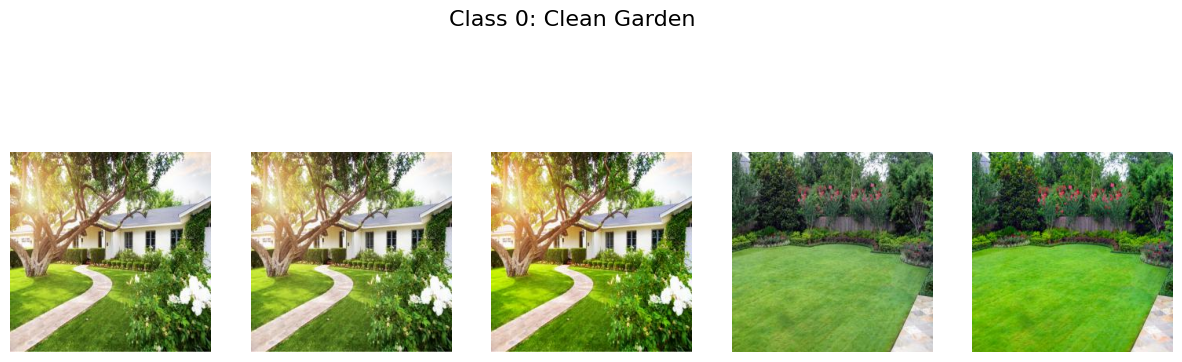

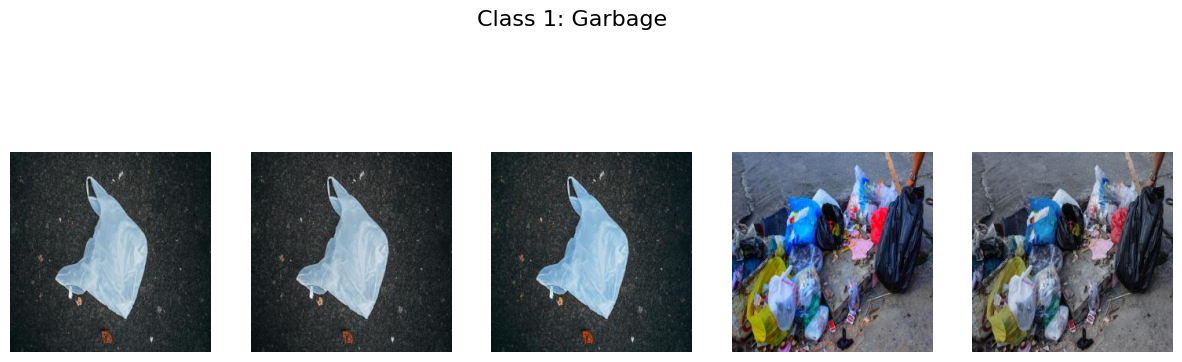

In [ ]:

# Pobranie obrazów i etykiet
images = dataset["train"]["image"]
labels = dataset["train"]["label"]

# Wybór 5 zdjęć z klasą 0 (czysty ogród) i 5 z klasą 1 (śmieci)
images_class_0 = [img for img, lbl in zip(images, labels) if lbl == 0][:5]
images_class_1 = [img for img, lbl in zip(images, labels) if lbl == 1][:5]

# Funkcja do wyświetlania obrazów
def show_images(images, title):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    fig.suptitle(title, fontsize=16)
    for ax, img in zip(axes, images):
        ax.imshow(img)
        ax.axis("off")
    plt.show()

# Wyświetlenie zdjęć
show_images(images_class_0, "Class 0: Clean Garden")
show_images(images_class_1, "Class 1: Garbage")


In [22]:
# Wypakowanie danych
train_images = dataset['train']['image']
train_labels = dataset['train']['label']

# Ustawienia ścieżek do zdjęć
path = Path('garbage_detection')

epoch,train_loss,valid_loss,error_rate,time
0,0.974255,1.021782,0.271186,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.322228,0.327257,0.135593,00:00
1,0.218013,0.097675,0.042373,00:00
2,0.157575,0.036656,0.000000,00:00
3,0.112969,0.015964,0.000000,00:00
4,0.086917,0.009528,0.000000,00:00


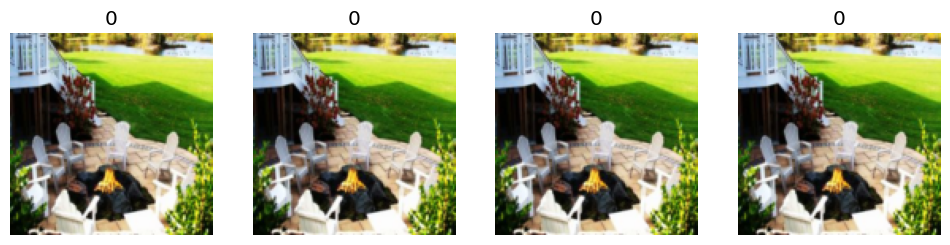

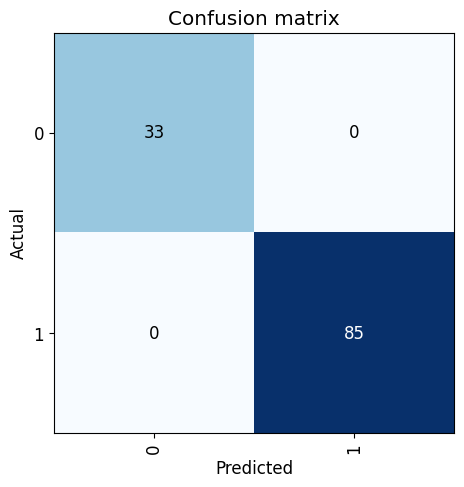

In [24]:
# Tworzenie DataBlock
garbage_detection = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=lambda x: x,  # Obrazy są już obiektami PIL
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=lambda x: train_labels[train_images.index(x)],
    item_tfms=Resize(128)
)

# Tworzenie DataLoaders
dls = garbage_detection.dataloaders(train_images)

# Wizualizacja próbek
dls.train.show_batch(max_n=4, nrows=1, unique=True)

# Tworzenie modelu
learn = vision_learner(dls, resnet18, metrics=error_rate)

# Trening modelu
learn.fine_tune(5)

# Interpretacja wyników
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
